In [13]:
import json
import os

import matplotlib.pyplot as plt

from model.pentomino import PieceConfig, RelPositions, Shapes, Colors, Board


def sample_piece(color, shape):
    target = PieceConfig(color, shape, RelPositions.CENTER)
    board = Board(15, 15)  # we need at least size of 3 * 5
    board.add_piece_from_config(target)
    arr = board.to_rgb_array()
    center = arr[5:10, 5:10]
    return center


def sample_image(split, color, shape):
    filename = f"{shape.value_name}_{color.value_name}.png"
    plt.axis("off")
    plt.imshow(sample_piece(color, shape))
    plt.savefig(f"data/single/{split}/{filename}", bbox_inches='tight')
    return filename

In [10]:
shapes = list(Shapes)
colors = list(Colors)
print(f"Shapes: {len(shapes)} Colors: {len(colors)} Combinations: {len(shapes) * len(colors)}")

Shapes: 12 Colors: 8 Combinations: 96


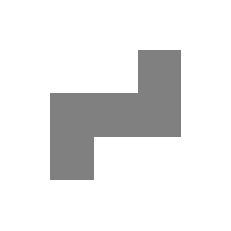

In [14]:
# we have all combinations except for each shape we do not choose a certain color

"""
[
  {
    "id": 0,
    "color": "BLUE",
    "shape": "F",
    "image": "F_blue.png"
  }
]
"""
counter = 0
samples = {
    "train": [],
    "val": [],
    "test": []
}
for split in samples:
    os.mkdir(f"data/single/{split}")
for shape_idx, shape in enumerate(shapes):
    for color_idx, color in enumerate(colors):
        if color_idx == (shape_idx % len(colors)):
            split = "test"
        elif color_idx == (shape_idx + 1 % len(colors)):
            split = "val"
        else:
            split = "train"
        filename = sample_image(split, color, shape)
        samples[split].append({
            "id": counter,
            "color": color.value,
            "shape": shape.value,
            "image": filename
        })
        counter += 1

for split in samples:
    with open(f"data/single/{split}.json", "w") as f:
        json.dump(samples[split], f)